<a href="https://colab.research.google.com/github/pythonuzgit/Computer-vision-in-Medical-imaging/blob/main/Computer-vision-in-Medical-imaging%20/Skin_canser_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d shashanks1202/skin-cancer-dataset

Dataset URL: https://www.kaggle.com/datasets/shashanks1202/skin-cancer-dataset
License(s): MIT
 80% 5.00M/6.29M [00:00<00:00, 28.5MB/s]
100% 6.29M/6.29M [00:00<00:00, 34.9MB/s]


In [ ]:
import tensorflow as tf
import pandas as pd
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten

<ipython-input-5-c9e2e424b22b>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:

os.chdir('/content/train_cancer/benign')
X = []
y = []

image_size = 150



for i in tqdm(os.listdir()):
  # Check if the file is an image
  if i.endswith(('.jpg', '.png', '.jpeg')): # Add other image extensions if needed
    img = cv2.imread(i)
    if img is not None: # Check if image was loaded correctly
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])



os.chdir('/content/train_cancer/malignant')

for i in tqdm(os.listdir()):
  # Check if the file is an image
  if i.endswith(('.jpg', '.png', '.jpeg')):
    img = cv2.imread(i)
    if img is not None:
      img = cv2.resize(img,(224,224))
      X.append(img)

for i in range(1,99):
  y.append('N')
print(y)

  0%|          | 0/30 [00:00<?, ?it/s]

7
2
3
2
3
3
1
1
4
2
2
2
3
4
3
4
2
1
2
1
2
2
1
3
2
3
3
4
3
6


  0%|          | 0/240 [00:00<?, ?it/s]

['7', '2', '3', '2', '3', '3', '1', '1', '4', '2', '2', '2', '3', '4', '3', '4', '2', '1', '2', '1', '2', '2', '1', '3', '2', '3', '3', '4', '3', '6', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


In [ ]:
from tqdm.auto import tqdm

X = []
y = []

image_size = 150

# Ensure the script is running in the directory with your images
# If not, use os.chdir() to change to the correct directory
print(os.getcwd()) # Print the current working directory

for i in tqdm(os.listdir()):
  # Check if the file is an image
  if i.endswith(('.jpg', '.png', '.jpeg')): # Add other image extensions if needed
    img = cv2.imread(i)
    if img is not None: # Check if image was loaded correctly
      img = cv2.resize(img,(224,224))
      X.append(img)
      y.append((i[0:1]))
      print(i[0:1])


# Check if X is populated
if not X:
    print("Error: No images were loaded. Check your file paths and image formats.")
else:
    # Continue with your processing if images were loaded
    for i in tqdm(os.listdir()):
      # Check if the file is an image
      if i.endswith(('.jpg', '.png', '.jpeg')):
        img = cv2.imread(i)
        if img is not None:
          img = cv2.resize(img,(224,224))
          X.append(img)

    for i in range(1,99):
      y.append('N')
    print(y)

/content/train_cancer/malignant


  0%|          | 0/240 [00:00<?, ?it/s]

1
2
1
7
2
2
2
1
2
5
2
8
2
1
7
2
9
9
1
1
2
1
2
1
2
4
1
2
2
1
7
3
8
2
2
1
1
1
2
2
1
2
1
2
1
4
2
1
1
1
1
1
3
2
1
3
9
1
1
2
1
2
6
1
2
2
1
1
2
7
2
7
1
2
2
4
2
2
2
1
1
1
2
2
1
2
1
9
1
2
6
1
2
1
1
2
2
1
1
5
2
1
1
2
1
1
2
1
2
4
1
1
1
2
2
1
1
2
1
6
8
2
2
2
3
1
1
7
1
9
1
1
2
1
2
1
3
1
5
8
1
5
2
5
3
1
1
1
2
2
2
5
6
2
2
1
4
1
2
2
1
9
1
7
2
1
6
1
2
5
1
1
2
1
1
7
2
1
2
2
1
8
2
2
1
2
2
2
2
2
1
9
6
1
1
1
1
8
1
4
3
2
2
2
1
2
2
3
2
2
2
1
2
1
1
2
8
1
2
2
2
1
2
2
4
6
1
2
2
2
7
1
1
2
2
1
9
4
1
2


  0%|          | 0/240 [00:00<?, ?it/s]

['1', '2', '1', '7', '2', '2', '2', '1', '2', '5', '2', '8', '2', '1', '7', '2', '9', '9', '1', '1', '2', '1', '2', '1', '2', '4', '1', '2', '2', '1', '7', '3', '8', '2', '2', '1', '1', '1', '2', '2', '1', '2', '1', '2', '1', '4', '2', '1', '1', '1', '1', '1', '3', '2', '1', '3', '9', '1', '1', '2', '1', '2', '6', '1', '2', '2', '1', '1', '2', '7', '2', '7', '1', '2', '2', '4', '2', '2', '2', '1', '1', '1', '2', '2', '1', '2', '1', '9', '1', '2', '6', '1', '2', '1', '1', '2', '2', '1', '1', '5', '2', '1', '1', '2', '1', '1', '2', '1', '2', '4', '1', '1', '1', '2', '2', '1', '1', '2', '1', '6', '8', '2', '2', '2', '3', '1', '1', '7', '1', '9', '1', '1', '2', '1', '2', '1', '3', '1', '5', '8', '1', '5', '2', '5', '3', '1', '1', '1', '2', '2', '2', '5', '6', '2', '2', '1', '4', '1', '2', '2', '1', '9', '1', '7', '2', '1', '6', '1', '2', '5', '1', '1', '2', '1', '1', '7', '2', '1', '2', '2', '1', '8', '2', '2', '1', '2', '2', '2', '2', '2', '1', '9', '6', '1', '1', '1', '1', '8', '1', '4',

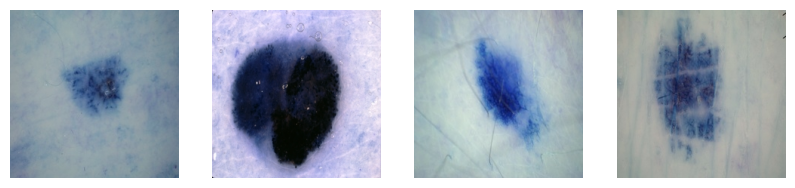

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap="gray")
    plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split # import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # split the data into training and testing sets
print ("Shape of an image in X_train: ", X_train[0].shape) # print the shape of an image in X_train
print ("Shape of an image in X_test: ", X_test[0].shape) # print the shape of an image in X_test

Shape of an image in X_train:  (224, 224, 3)
Shape of an image in X_test:  (224, 224, 3)


In [ ]:
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
# Determine the number of unique classes
num_classes = len(np.unique(y_train))
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes) # Set num_classes to the actual number of classes
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes) # Set num_classes to the actual number of classes
y_train = np.array(y_train)
X_train = np.array(X_train)
y_test = np.array(y_test)
X_test = np.array(X_test)


X_train Shape:  (180, 224, 224, 3)
X_test Shape:  (90, 224, 224, 3)
y_train Shape:  (180, 7)
y_test Shape:  (90, 7)


In [ ]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (180, 224, 224, 3)
X_test Shape:  (90, 224, 224, 3)
y_train Shape:  (180, 7)
y_test Shape:  (90, 7)


In [ ]:
from keras.applications import vgg16

In [ ]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


In [ ]:
#Update num_classes to  match the number of classes in your dataset (7 in this case)
num_classes = 7

# Recreate the model with the correct number of classes
FC_Head = lw(vgg, num_classes)
model = Model(inputs = vgg.input, outputs = FC_Head)
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │         525,3

 Total params: 16,817,991 (64.16 MB)

 Trainable params: 2,103,303 (8.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [ ]:
from tensorflow.keras.models import Model
model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,
                    epochs=5,
                    validation_data=(X_test,y_test),
                    verbose = 1,
                    initial_epoch=0)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 168s 28s/step - accuracy: 0.7826 - loss: 2.3000 - val_accuracy: 0.0000e+00 - val_loss: 14.1606
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 186s 34s/step - accuracy: 0.8426 - loss: 0.9650 - val_accuracy: 0.0000e+00 - val_loss: 11.1970
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 203s 34s/step - accuracy: 0.8696 - loss: 0.6916 - val_accuracy: 0.0000e+00 - val_loss: 6.7550
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 175s 28s/step - accuracy: 0.9418 - loss: 0.2105 - val_accuracy: 0.0111 - val_loss: 5.9021
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 234s 34s/step - accuracy: 0.9558 - loss: 0.1648 - val_accuracy: 0.0111 - val_loss: 8.3014


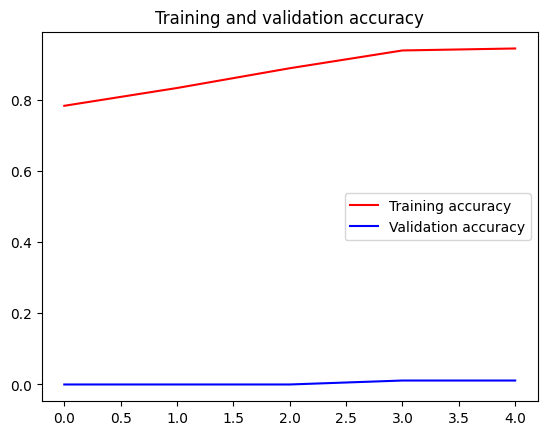

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()